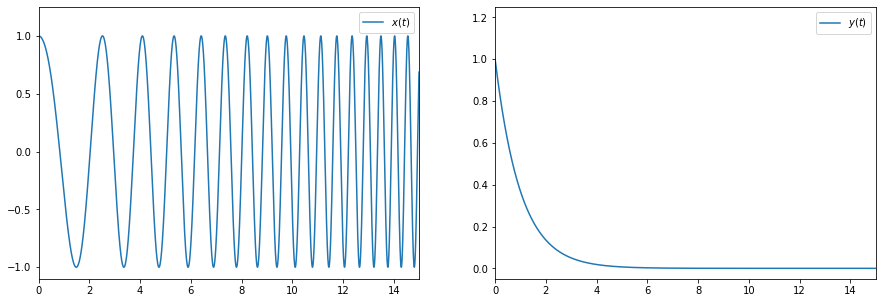

In [16]:
### Les imports ###

import numpy as np
import scipy as sp
from scipy import signal
import skimage as sk
import skimage.io
import matplotlib.pyplot as plt
# Matplotlib in inline mode
%matplotlib inline

####################### defining time vector  #######################
tmax = 15 # max time (in sec)
tmin = 0 # min time (does not mean anything but has to be defined)
fe = 250 # sampling frequency (in Hz)
Te = 1/fe # sampling period (fe points per second)
t = np.arange(tmin,tmax,Te)
#####################################################################

# Let's define two signals
x = sp.signal.chirp(t, 0.25, t.max(), 2)
y = np.exp(-t)


plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,x,label=r'$x(t)$')
plt.xlim(t.min(),t.max())
plt.ylim(ymax=1.25)
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(t,y,label=r'$y(t)$')
plt.xlim(t.min(),t.max())
plt.ylim(ymax=1.25)
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

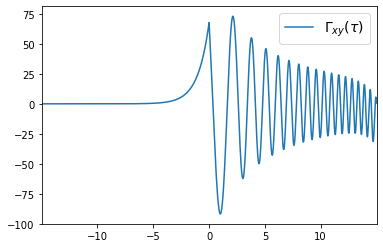

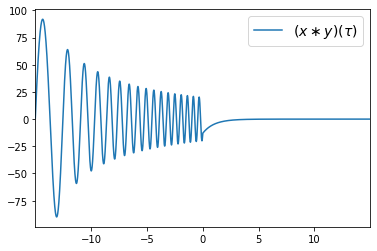

In [17]:
t_corr = np.arange(-tmax+Te,tmax,Te)
G_xy = sp.signal.correlate(x,y)
plt.plot(t_corr,G_xy,label=r'$\Gamma_{xy}(\tau)$')
plt.xlim(t_corr.min(),t_corr.max())
plt.legend(loc='best',fontsize=14)
plt.show()

Conv_xy = sp.signal.convolve(x,y)
plt.plot(t_corr,Conv_xy,label=r'$(x \ast y)(\tau)$')
plt.xlim(t_corr.min(),t_corr.max())
plt.legend(loc='best',fontsize=14)
plt.show()

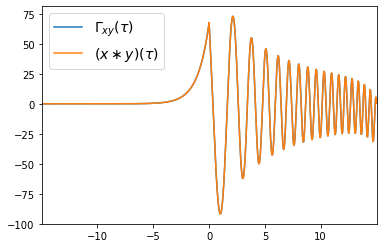

In [29]:
Conv_xy = sp.signal.convolve(x,y[::-1])
plt.plot(t_corr,G_xy,label=r'$\Gamma_{xy}(\tau)$')
plt.plot(t_corr,Conv_xy,label=r'$(x \ast y)(\tau)$')
plt.xlim(t_corr.min(),t_corr.max())
plt.legend(loc='best',fontsize=14)
plt.show()

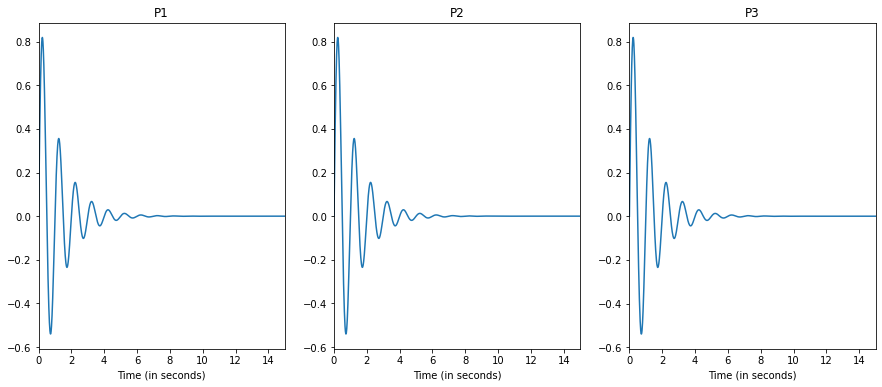

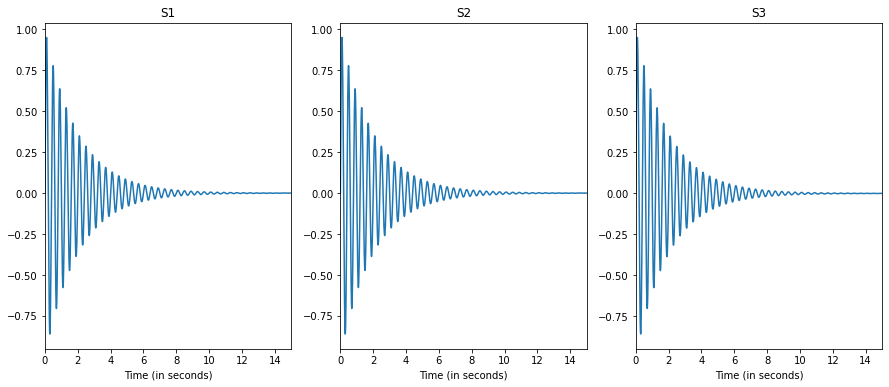

In [25]:
# Template des signaux P1, P2 et P3
tmax = 15 # max time (in sec)
tmin = 0 # min time (does not mean anything but has to be defined)
fe = 250 # sampling frequency (in Hz)
Te = 1/fe # sampling period (fe points per second)
t = np.arange(tmin,tmax,Te)
A_ref = 1
t0 = 1.2
f0 = 1
P1 = A_ref*np.exp(-t/t0)*np.sin(2*np.pi*f0*t)
fe2 = 250/2 # sampling frequency (in Hz)
Te2 = 1/fe2 # sampling period (fe points per second)
t2 = np.arange(tmin,tmax,Te2)
P2 = A_ref*np.exp(-t2/t0)*np.sin(2*np.pi*f0*t2)
fe3 = 250/4 # sampling frequency (in Hz)
Te3 = 1/fe3 # sampling period (fe points per second)
t3 = np.arange(tmin,tmax,Te3)
P3 = A_ref*np.exp(-t3/t0)*np.sin(2*np.pi*f0*t3)
# ----------------------------------
# -------- plot that stuff ---------
# ----------------------------------
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(t,P1)
plt.xlim((t.min(),t.max()))
plt.xlabel('Time (in seconds)')
plt.title('P1')
plt.subplot(132)
plt.plot(t2, P2)
plt.xlim((t.min(),t.max()))
plt.xlabel('Time (in seconds)')
plt.title('P2')
plt.subplot(133)
plt.plot(t3, P3)
plt.xlim((t.min(),t.max()))
plt.xlabel('Time (in seconds)')
plt.title('P3')
plt.show()

# Template des signaux S1, S2 et S3
tmax = 15 # max time (in sec)
tmin = 0 # min time (does not mean anything but has to be defined)
fe = 250 # sampling frequency (in Hz)
Te = 1/fe # sampling period (fe points per second)
t = np.arange(tmin,tmax,Te)
A_ref = 1
t0 = 1
f0 = 1
S1 = A_ref*np.exp(-0.5*t/t0)*np.sin(5*np.pi*f0*t)
fe2 = 250/2 # sampling frequency (in Hz)
Te2 = 1/fe2 # sampling period (fe points per second)
t2 = np.arange(tmin,tmax,Te2)
S2 = A_ref*np.exp(-0.5*t2/t0)*np.sin(5*np.pi*f0*t2)
fe3 = 250/4 # sampling frequency (in Hz)
Te3 = 1/fe3 # sampling period (fe points per second)
t3 = np.arange(tmin,tmax,Te3)
S3 = A_ref*np.exp(-0.5*t3/t0)*np.sin(5*np.pi*f0*t3)
# ----------------------------------
# -------- plot that stuff ---------
# ----------------------------------
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(t,S1)
plt.xlim((t.min(),t.max()))
plt.xlabel('Time (in seconds)')
plt.title('S1')
plt.subplot(132)
plt.plot(t2,S2)
plt.xlim((t.min(),t.max()))
plt.xlabel('Time (in seconds)')
plt.title('S2')
plt.subplot(133)
plt.plot(t3,S3)
plt.xlim((t.min(),t.max()))
plt.xlabel('Time (in seconds)')
plt.title('S3')
plt.show()

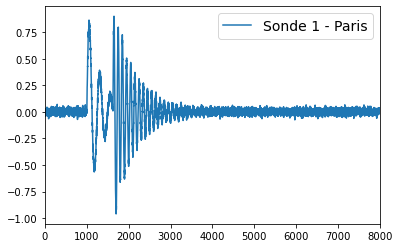

In [26]:
### Chargement de l'enregistrement de la sonde 1 Paris
Sonde_1 = np.load("signaux/sonde1.npy")
plt.plot(Sonde_1,label='Sonde 1 - Paris')
plt.xlim(0,Sonde_1.size)
plt.legend(loc='best',fontsize=14)
plt.show()

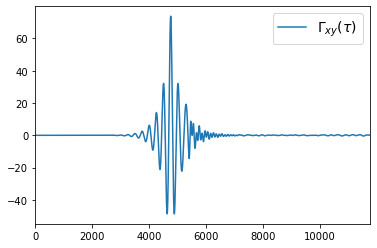

In [45]:
# Recherche du retard du premier signal P1 dans l'enregistrement 1
PP1 = sp.signal.correlate(Sonde_1,P1)
plt.plot(PP1,label=r'$\Gamma_{xy}(\tau)$')
plt.xlim(0,PP1.size)
plt.legend(loc='best',fontsize=14)
plt.show()

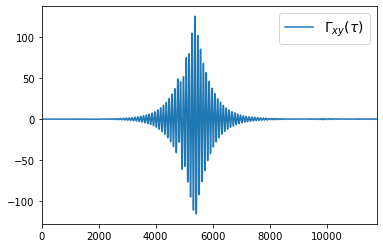

In [34]:
# Recherche du retard du signal S1 dans l'enregistrement 1
SS1 = sp.signal.correlate(Sonde_1,S1)
plt.plot(SS1,label=r'$\Gamma_{xy}(\tau)$')
plt.xlim(0,SS1.size)
plt.legend(loc='best',fontsize=14)
plt.show()

In [52]:
# Calcul de ts-tp en nombre de points
index_array = np.argmax(SS1) - np.argmax(PP1)
index_array

624

In [53]:
# Attention, on a un décalage en points. 
# Or d'apres la notice de la sonde, 1 seconde = combien de points ?  
# modifiez la valeur de ts-tp pour l'avoir en secondes... 
diff = index_array / 2
# Ce qui nous donne pour d :
d1 = 8 * diff
d1

2496.0

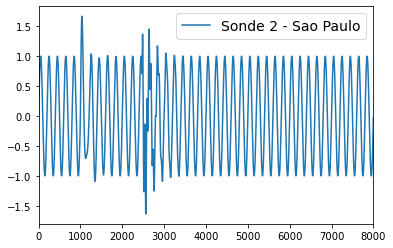

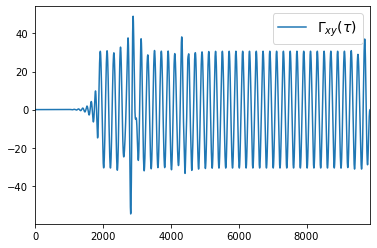

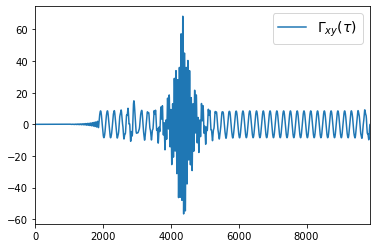

11720

In [57]:
### Chargement de l'enregistrement de la sonde 2 Sao Paulo
Sonde_2 = np.load("signaux/sonde2.npy")
plt.plot(Sonde_2,label='Sonde 2 - Sao Paulo')
plt.xlim(0,Sonde_2.size)
plt.legend(loc='best',fontsize=14)
plt.show()

# Recherche du retard du premier signal P2 dans l'enregistrement 2
PP2 = sp.signal.correlate(Sonde_2,P2)
plt.plot(PP2,label=r'$\Gamma_{xy}(\tau)$')
plt.xlim(0,PP2.size)
plt.legend(loc='best',fontsize=14)
plt.show()

# Recherche du retard du signal S2 dans l'enregistrement 2
SS2 = sp.signal.correlate(Sonde_2,S2)
plt.plot(SS2,label=r'$\Gamma_{xy}(\tau)$')
plt.xlim(0,SS2.size)
plt.legend(loc='best',fontsize=14)
plt.show()

# Calcul de ts-tp en nombre de points
index_array_2 = np.argmax(SS2) - np.argmax(PP2)

# Attention, on a un décalage en points. 
# Or d'apres la notice de la sonde, 1 seconde = combien de points ?  
# modifiez la valeur de ts-tp pour l'avoir en secondes... 
diff_2 = index_array_2
# Ce qui nous donne pour d :
d2 = 8 * diff_2
d2

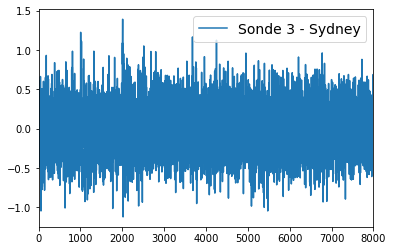

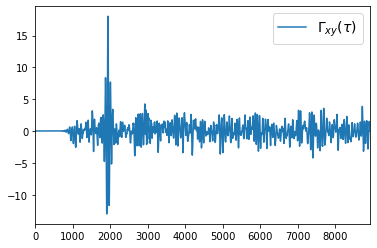

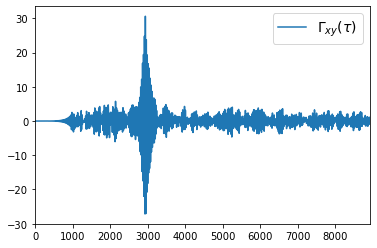

15984

In [59]:
### Chargement de l'enregistrement de la sonde 3 Sidney
Sonde_3 = np.load("signaux/sonde3.npy")
plt.plot(Sonde_3,label='Sonde 3 - Sydney')
plt.xlim(0,Sonde_3.size)
plt.legend(loc='best',fontsize=14)
plt.show()

# Recherche du retard du premier signal P3 dans l'enregistrement 3
PP3 = sp.signal.correlate(Sonde_3,P3)
plt.plot(PP3,label=r'$\Gamma_{xy}(\tau)$')
plt.xlim(0,PP3.size)
plt.legend(loc='best',fontsize=14)
plt.show()

# Recherche du retard du signal S3 dans l'enregistrement 3
SS3 = sp.signal.correlate(Sonde_3,S3)
plt.plot(SS3,label=r'$\Gamma_{xy}(\tau)$')
plt.xlim(0,SS3.size)
plt.legend(loc='best',fontsize=14)
plt.show()

# Calcul de ts-tp en nombre de points
index_array_3 = np.argmax(SS3) - np.argmax(PP3)

# Attention, on a un décalage en points. 
# Or d'apres la notice de la sonde, 1 seconde = combien de points ?  
# modifiez la valeur de ts-tp pour l'avoir en secondes... 
diff_3 = index_array_3
# Ce qui nous donne pour d :
d3 = 8 * diff_3 * 2
d3

In [67]:
################### NE PAS TOUCHER ##################
# Cette cellule correspond à l'image bleue et au noyau orange
image = np.array([[60,113,56,139,85],
                  [73,121,54,84,128],
                  [131,99,70,129,127],
                  [80,57,115,69,134],
                  [104,126,123,95,130]])
noyau = np.zeros((3,3))
noyau[1,:]=-1
noyau[:,1]=-1
noyau[1,1]=5
######################################################

def ma_conv_img(input_image, input_noyau):
    #Commencez par le padding
    image_row = np.size(input_image, 1)
    image_col = np.size(input_image, 0)
    im_pad = np.zeros((image_row + 2, image_col + 2))
    for i in range (1, image_row + 1):
        for j in range (1, image_col + 1):
            im_pad[i][j] = input_image[i - 1][j - 1]
    #Puis faites glisser le noyau sur l'image et calculez le résultat de convolution
    for i in range(1, image_row + 1):
        for j in range(1, image_col + 1):
            im_pad[i][j] = 5 * im_pad[i][j] - im_pad[i][j - 1] - im_pad[i][j + 1] - im_pad[i - 1][j] - im_pad[i + 1][j]
    return im_pad

ma_conv_img(image, noyau)

NameError: name 'image_pad' is not defined